Inital Test of Plot
#Adopted from https://stackoverflow.com/questions/23377665/python-scipy-fft-wav-files

In [2]:
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.io import wavfile # get the api

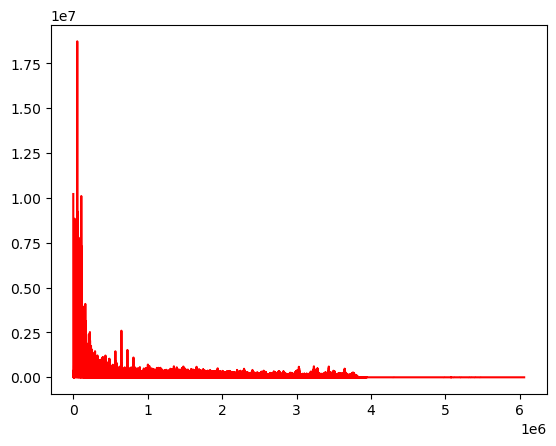

In [94]:
fs, data = wavfile.read(r"C:\Users\rmpem\OneDrive\Desktop\ACU Files\Music for Machine Learning Project\1-believe.wav") # load the data
a = data.T[0] # this is a two channel soundtrack, I get the first track
b=[(ele/2**8.)*2-1 for ele in a] # this is 8-bit track, b is now normalized on [-1,1)
c = fft(b) # calculate fourier transform (complex numbers list)
d = int(len(c)/2)  # you only need half of the fft list (real signal symmetry)
plt.plot(abs(c[:(d-1)]),'r')
plt.show()

Messing around with the Fourier Tranform Code

In [98]:

a = 'C:\\Users\\rmpem\\OneDrive\\Desktop\\ACU Files\\Music for Machine Learning Project\\1-believe.wav'
#fs is 44100 Hz, data is two tracks, each track is basically the same, so it doesn't matter which one it is given
fs, data = wavfile.read(a, 'r') # load the data
a = data.T[1] # this is a two channel soundtrack, I get the first track
b=[(ele/2**8.)*2-1 for ele in a] # this is 8-bit track, b is now normalized on [-1,1)
c = fft(b) # calculate fourier transform (complex numbers list)
d = int(len(c)/2)  # you only need half of the fft list (real signal symmetry)
print(c)

[-10448067.03125        -0.j           -838708.60303244+234534.68508393j
    243412.52509602+353794.6852229j  ...
   -849189.13504421+679926.32329512j    243412.52509602-353794.6852229j
   -838708.60303244-234534.68508393j]


(47005.14021642418-28741.777091233962j)
714


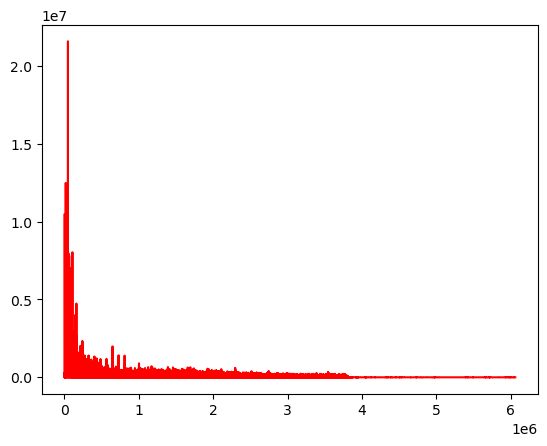

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



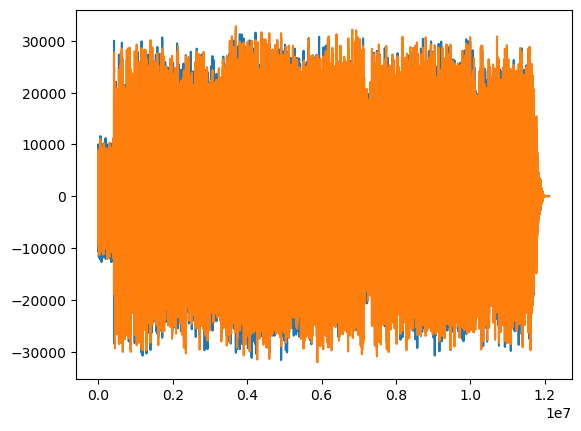

In [99]:
print(c[750000])
print(a[1000])
plt.plot(abs(c[:(d-1)]),'r')
plt.show()
plt.plot(data)

Takes csv of file paths and puts them in usable format

In [4]:
import pandas as pd
import numpy as np
data = pd.read_csv("C:\\Users\\rmpem\\OneDrive\\Desktop\\Machine Learning Project\\ML_File_Paths.csv")
print(data.head())
names = data["File_Paths"]

                                          File_Paths   Something
0  C:\Users\rmpem\OneDrive\Desktop\ACU Files\Musi...         NaN
1  C:\Users\rmpem\OneDrive\Desktop\ACU Files\Musi...         NaN
2  C:\Users\rmpem\OneDrive\Desktop\ACU Files\Musi...         NaN
3  C:\Users\rmpem\OneDrive\Desktop\ACU Files\Musi...         NaN
4  C:\Users\rmpem\OneDrive\Desktop\ACU Files\Musi...         NaN


In [69]:
print(names[0])

C:\Users\rmpem\OneDrive\Desktop\ACU Files\Music for Machine Learning Project\1-believe.wav


Loop that will compute FFT and plot it for the first five songs. THIS IS THE IMPORTANT THING TO TAKE AWAY FROM THIS DOCUMENT

In [76]:
#https://numpy.org/doc/stable/reference/generated/numpy.histogram.html
#https://www.geeksforgeeks.org/writing-csv-files-in-python/
import csv

# name of csv file
filename = "ML_Project_Frequency_Distributions.csv"
all_fourier = []
thing = 8000000
# writing the fields
for path in range(0,10):
    e = str(names[path])
    fs, data = wavfile.read(e, 'r') # load the data
    a = data.T[0] # this is a two channel soundtrack, I get the first track
    c = fft(a, n = thing) # calculate fourier transform (complex numbers list)
    d = int(len(c)/2)  # you only need half of the fft list (real signal symmetry)
    fourier, frequency = np.histogram(abs(c[:(d-1)]), bins=np.arange(0,20000,2))
    fourier = fourier.tolist()
    all_fourier.append(fourier)
with open(filename, 'w') as csvfile:
    # creating a csv writer object
    csvwriter = csv.writer(csvfile)
    # writing the data rows
    csvwriter.writerow(np.arange(0,20000,2))
    csvwriter.writerows(all_fourier)
    #k = np.arange(len(data))
    #T = len(data)/fs  # where fs is the sampling frequency
    #frqLabel = k/T  
    #plt.plot(frqLabel[:d-1], abs(c[:(d-1)]),'r')
    #plt.show()

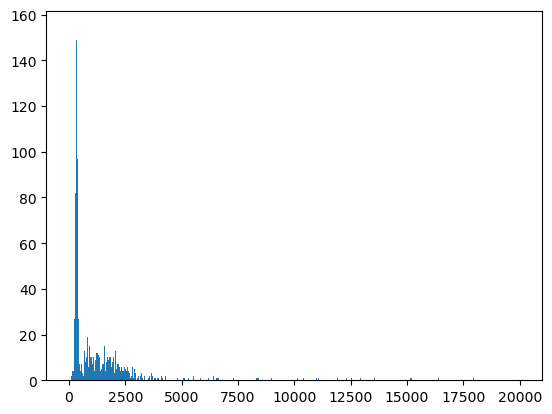

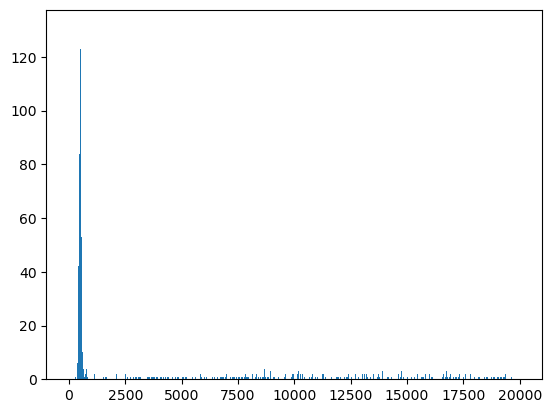

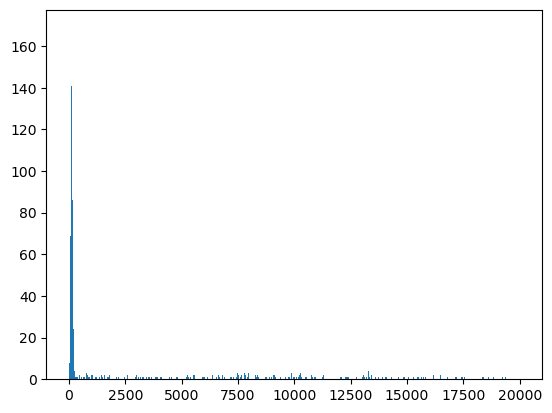

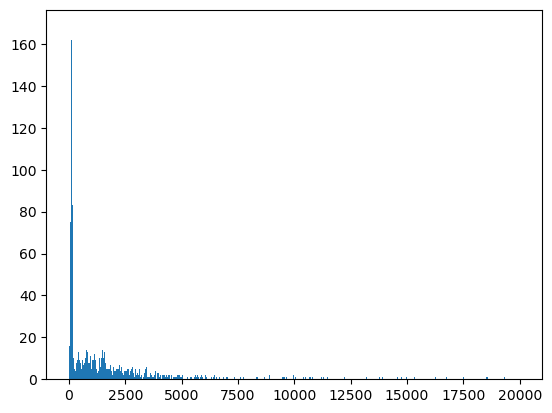

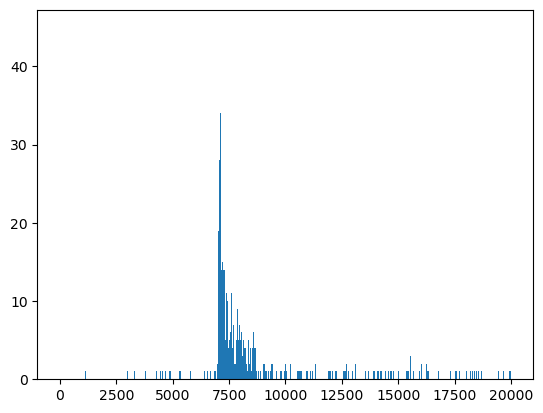

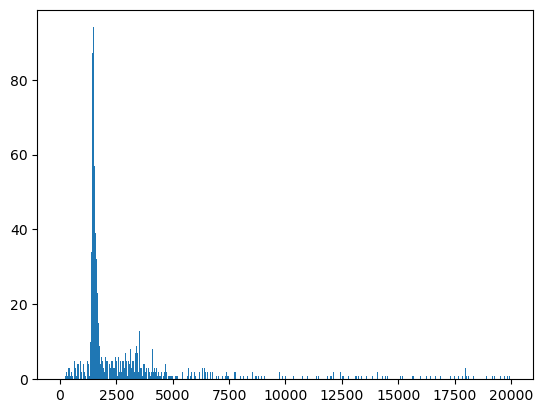

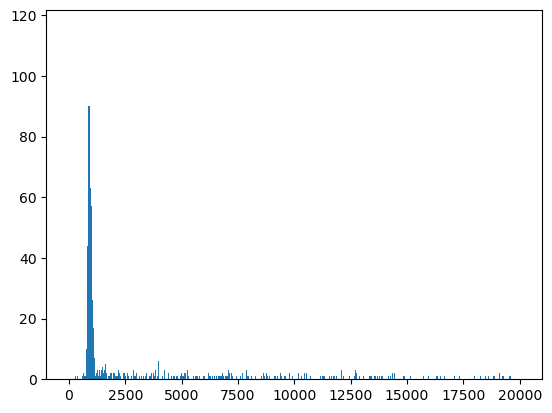

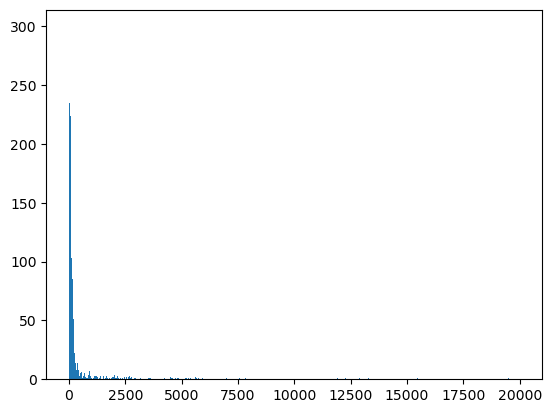

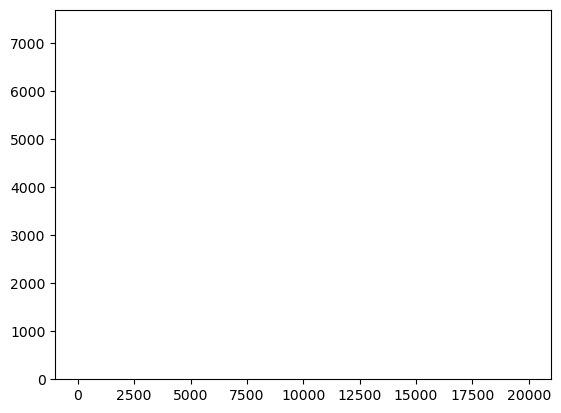

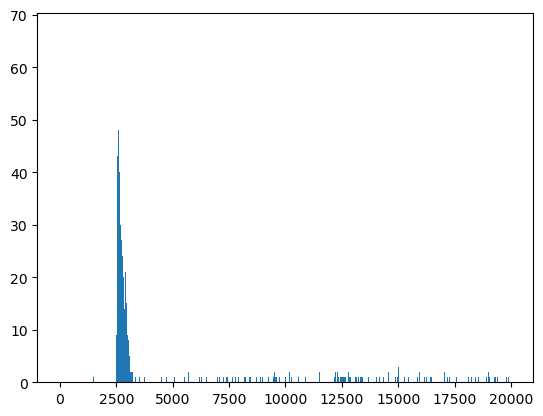

In [91]:
thing = 40000
#np.arange(0,20000,200)
for path in range(0,10):
    e = str(names[path])
    fs, data = wavfile.read(e, 'r') # load the data
    a = data.T[0] # this is a two channel soundtrack, I get the first track
    c = fft(a, n = thing) # calculate fourier transform (complex numbers list)
    d = int(len(c)/2)  # you only need half of the fft list (real signal symmetry)
    k = np.arange(len(data))
    T = len(data)/fs  # where fs is the sampling frequency
    frqLabel = k/T  
    plt.hist(abs(c[:(d-1)]), bins=np.arange(0,20000,2))
    plt.show()
    #k = np.arange(len(data))
    #T = len(data)/fs  # where fs is the sampling frequency
    #frqLabel = k/T  
    #plt.plot(frqLabel[:d-1], abs(c[:(d-1)]),'r')
    #plt.show()

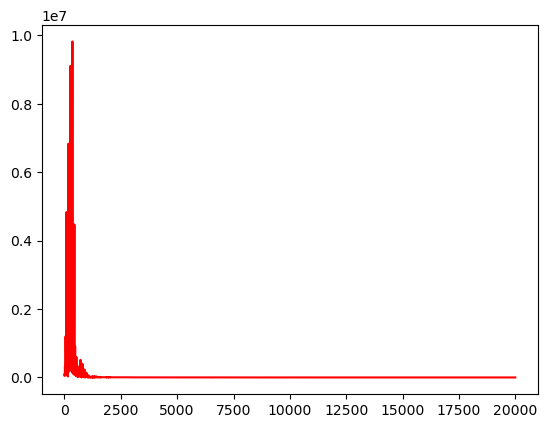

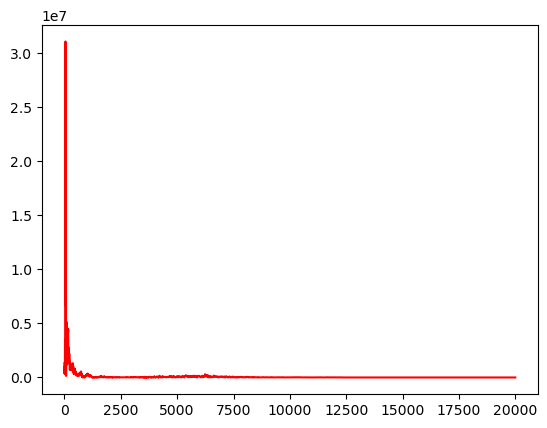

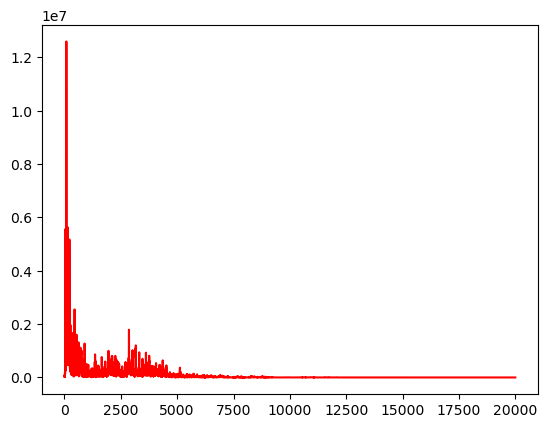

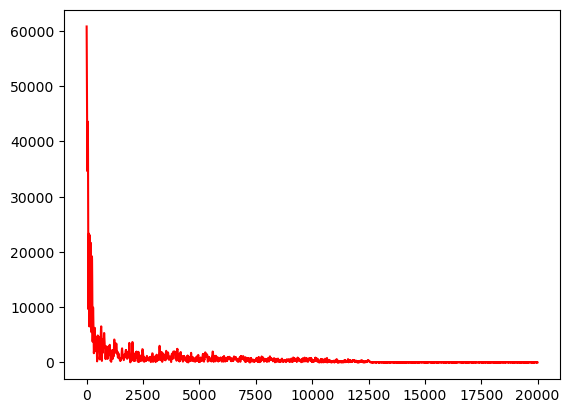

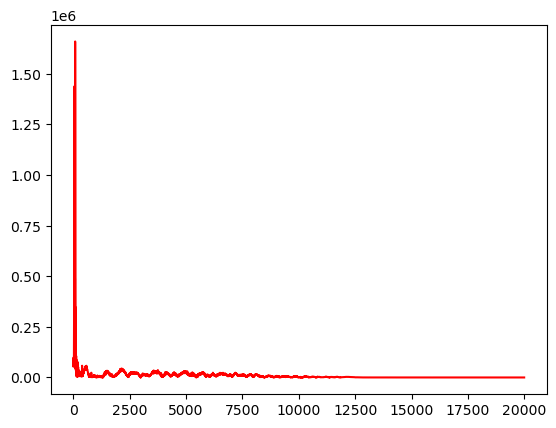

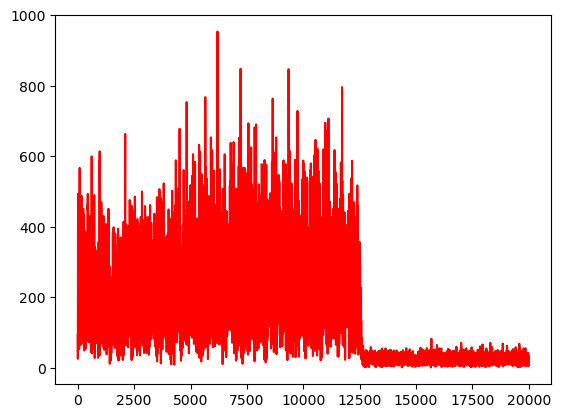

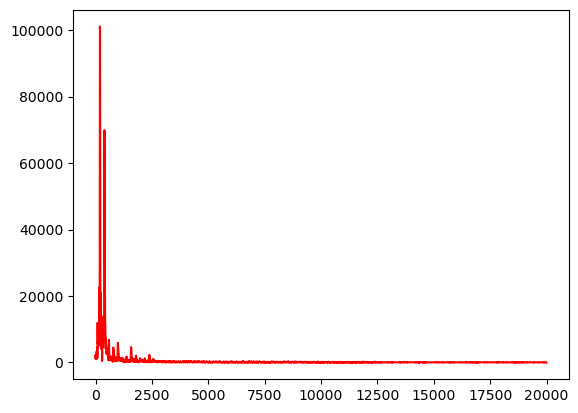

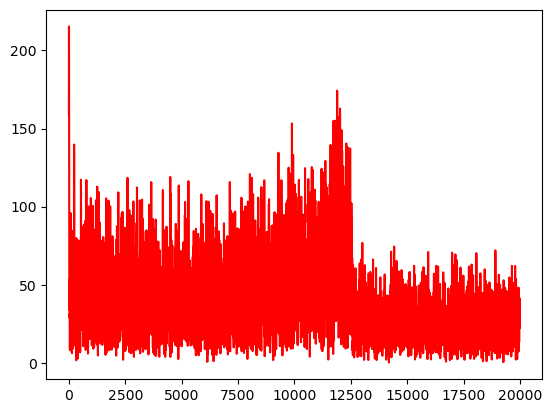

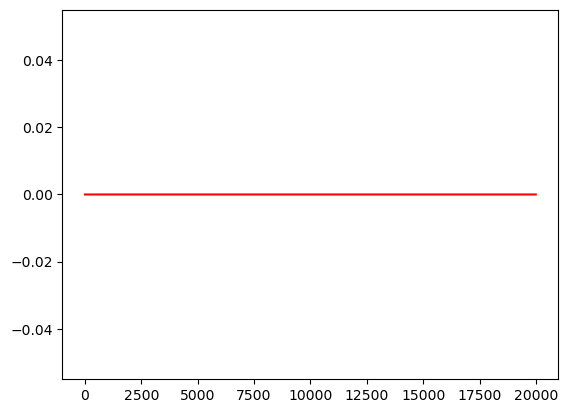

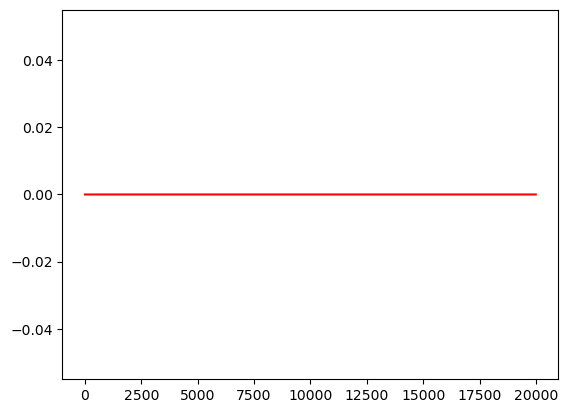

In [90]:
thing = 10000
for path in range(0,10):
    e = str(names[path])
    fs, data = wavfile.read(e, 'r') # load the data
    a = data.T[0] # this is a two channel soundtrack, I get the first track
    c = fft(a, n = thing) # calculate fourier transform (complex numbers list)
    d = int(len(c)/2)  # you only need half of the fft list (real signal symmetry)
    k = np.arange(len(data))
    T = len(data)/fs  # where fs is the sampling frequency
    frqLabel = k/T*(8000000/thing)  
    plt.plot(np.arange(0,20000,20000/d), abs(c[:(d)]),'r')
    plt.show()

In [82]:
k = np.arange(len(data))
T = len(data)/fs  # where fs is the sampling frequency
frqLabel = k/T  
print(frqLabel/2)

[0.00000000e+00 1.81961696e-03 3.63923391e-03 ... 2.20499945e+04
 2.20499964e+04 2.20499982e+04]


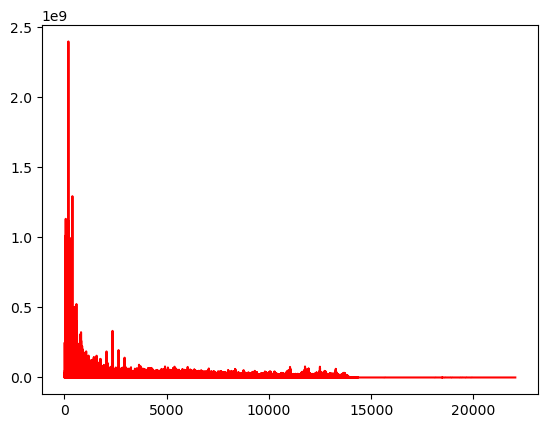

In [108]:
plt.plot(frqLabel[:d-1], abs(c[:(d-1)]),'r')
plt.show()

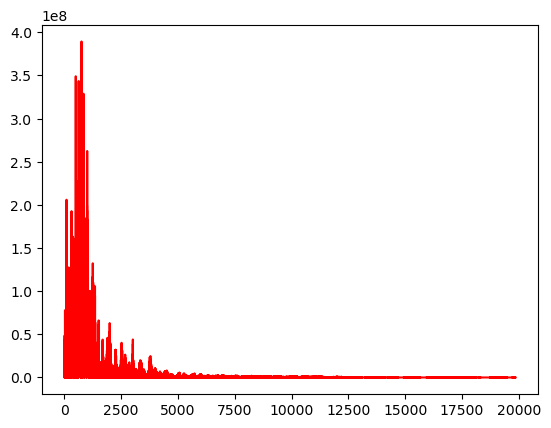

In [63]:
fs, data = wavfile.read(names[3], 'r') # load the data
thing = 8*10**6
a = data.T[0] # this is a two channel soundtrack, I get the first track
c = fft(a, n = thing) # calculate fourier transform (complex numbers list)
d = int(len(c)/2)  # you only need half of the fft list (real signal symmetry)
k = np.arange(len(data))
T = len(data)/fs  # where fs is the sampling frequency
frqLabel = k/T*(8000000/thing)  
plt.plot(frqLabel[:d-1], abs(c[:(d-1)]),'r')
plt.show()

In [46]:
print(d)

2000000


In [67]:
np.histogram(abs(c[:(d-1)]), bins=np.arange(0,20000,2))

(array([2, 3, 2, ..., 3, 4, 3], dtype=int64),
 array([    0,     2,     4, ..., 19994, 19996, 19998]))

(array([2., 3., 2., ..., 3., 4., 3.]),
 array([0.0000e+00, 2.0000e+00, 4.0000e+00, ..., 1.9994e+04, 1.9996e+04,
        1.9998e+04]),
 <BarContainer object of 9999 artists>)

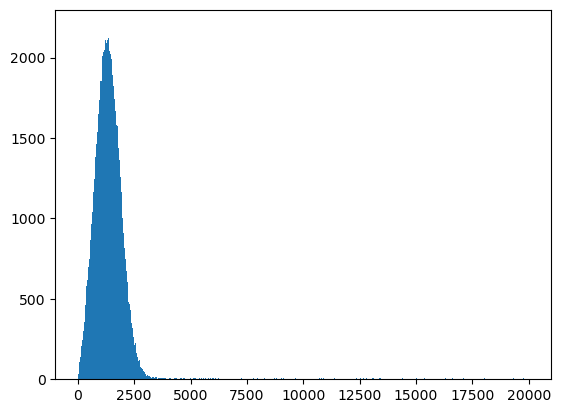

In [66]:
plt.hist(abs(c[:(d-1)]), bins=np.arange(0,20000,2))